In [4]:
#Importas las librerías requeridas
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
#Cargar el dataset
data = pd.read_csv('comprar_alquilar.csv')


NameError: name 'plt' is not defined

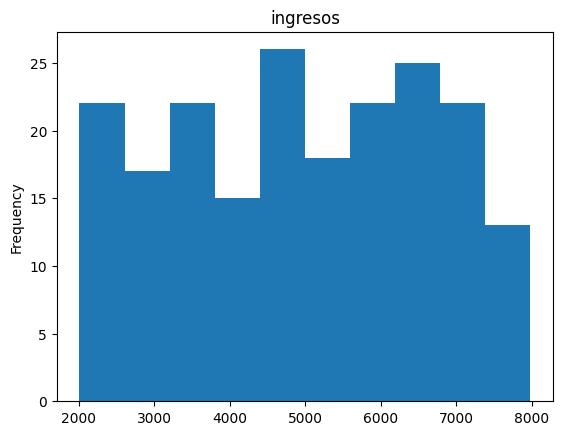

In [6]:
# Describir cada variable creando un histograma para las variables independientes
variables = data.columns[:-1]  # Todas las columnas excepto la última (comprar)

for variable in variables:
    data[variable].plot(kind='hist', title=variable)
    plt.show()

In [ ]:
# Mostrar la correlación de todas las variables independientes
correlation_matrix = data[variables].corr()
correlation_matrix


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
ingresos,1.000000,0.560211,-0.109780,-0.124105,0.712889,0.614721,-0.042556,-0.024483,-0.038852
gastos_comunes,0.560211,1.000000,-0.054400,-0.099881,0.209414,0.204781,-0.057152,-0.072321,-0.079095
pago_coche,-0.109780,-0.054400,1.000000,0.010602,-0.193299,-0.094631,0.052239,-0.044858,0.018946
gastos_otros,-0.124105,-0.099881,0.010602,1.000000,-0.064384,-0.054577,-0.020226,0.124845,0.047313
ahorros,0.712889,0.209414,-0.193299,-0.064384,1.000000,0.605836,-0.063039,0.001445,-0.023829
vivienda,0.614721,0.204781,-0.094631,-0.054577,0.605836,1.000000,-0.113420,-0.141924,-0.211790
estado_civil,-0.042556,-0.057152,0.052239,-0.020226,-0.063039,-0.113420,1.000000,0.507609,0.589512
hijos,-0.024483,-0.072321,-0.044858,0.124845,0.001445,-0.141924,0.507609,1.000000,0.699916
trabajo,-0.038852,-0.079095,0.018946,0.047313,-0.023829,-0.211790,0.589512,0.699916,1.000000


In [ ]:
# Mostrar la correlación con la variable dependiente "comprar"
correlacion_vs_variabledependiente = data[variables].corrwith(data['comprar'])
correlacion_vs_variabledependiente

ingresos          0.467123
gastos_comunes    0.200191
pago_coche       -0.196468
gastos_otros     -0.110330
ahorros           0.340778
vivienda         -0.146092
estado_civil      0.142799
hijos             0.272883
trabajo           0.341537
dtype: float64

In [ ]:
# Identificar las 5 variables con mayor correlación con la variable a predecir
top_5_variables_correlacion = correlacion_vs_variabledependiente.abs().nlargest(5)
top_5_variables_correlacion

ingresos          0.467123
trabajo           0.341537
ahorros           0.340778
hijos             0.272883
gastos_comunes    0.200191
dtype: float64

In [ ]:
# Evaluar la posibilidad de multicolinealidad
# Aquí puedes calcular el VIF para cada variable si lo deseas.


In [ ]:
# Utilizar SelectKBest para seleccionar las 5 mejores variables
X = data[variables]
y = data['comprar']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features_to_select = 5
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
# Entrenar dos modelos: uno con todas las variables y otro con las 5 mejores
model_all_features = LinearRegression()
model_selected_features = LinearRegression()

model_all_features.fit(X_train, y_train)
model_selected_features.fit(X_train_selected, y_train)

LinearRegression()

In [ ]:
# Comparar ambos modelos y elegir el mejor en términos de precisión (accuracy)
from sklearn.metrics import accuracy_score

y_pred_all_features = model_all_features.predict(X_test)
y_pred_selected_features = model_selected_features.predict(X_test_selected)

accuracy_all_features = accuracy_score(y_test, [1 if p > 0.5 else 0 for p in y_pred_all_features])
accuracy_selected_features = accuracy_score(y_test, [1 if p > 0.5 else 0 for p in y_pred_selected_features])

mejor_modelo = model_all_features if accuracy_all_features > accuracy_selected_features else model_selected_features
print(f'Resultados considerando todas las características = {accuracy_all_features}' )
print (f'Resultados considerando todas las características = {accuracy_selected_features}')

0.9024390243902439
0.7560975609756098


In [ ]:
# Entrenar el modelo seleccionado con todas las observaciones
# y crear dos predicciones utilizando los datos de prueba proporcionados
nuevos_datos = pd.DataFrame({
    'ingresos': [2000, 6000],
    'gastos_comunes': [944, 944],
    'pago_coche': [0, 0],
    'gastos_otros': [245, 245],
    'ahorros': [5000, 34000],
    'vivienda': [200000, 320000],
    'estado_civil': [0, 1],
    'hijos': [0, 2],
    'trabajo': [1, 1]
})

In [ ]:
# Seleccionar las mejores características para los nuevos datos
nuevos_datos_selected = selector.transform(nuevos_datos)

# Predicciones utilizando el modelo con todas las variables
prediccion_nuevos_datos_all_features = model_all_features.predict(nuevos_datos)


# Traducir las predicciones a "comprar" o "no comprar"
resultado_prediccion_all_features = ["no comprar" if prediccion <= 0.5 else "comprar" for prediccion in prediccion_nuevos_datos_all_features]

# Asignar nombres a los casos
casos = ["Primer caso", "Segundo caso"]

# Crear un diccionario con los resultados
resultados_all_features = dict(zip(casos, resultado_prediccion_all_features))

print('Se considero el modelo con todas las variables ya que fue más alto 0.902 vs modelo con variables seleccionadas 0.756')
print("\nPredicción para nuevos datos (modelo con todas las variables):")
for caso, resultado in resultados_all_features.items():
    print(f"{caso}: {resultado}")



Predicción para nuevos datos (modelo con todas las variables):
Primer caso: no comprar
Segundo caso: comprar
